___
# README: Processing raw files

- This notebook processes raw files obtained from [International IDEA](https://www.idea.int/data-tools/data/voter-turnout-database) website
- Before running the next cells, please upload the following .xls files to the Files section in Google Colab (left panel)
  - idea_presidential_1945_2023.xls
  - idea_legislative_1945_2023.xls
- The .xls files can be found [here](https://drive.google.com/drive/folders/1BRZDIJbGsH7pl22K9yEC3dhUOb0K-_eT?usp=drive_link).

___

## 1. Data processing

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)

In [ ]:
PATH_TO_PRESI = '/content/idea_presidential_1945_2023.xls'
PATH_TO_LEGIS = '/content/idea_legislative_1945_2023.xls'

tmp_1 = pd.read_excel(PATH_TO_PRESI)
tmp_2 = pd.read_excel(PATH_TO_LEGIS)

print(tmp_1.shape)
tmp_1.head(3)

(1094, 13)


,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type
0,Afghanistan,AF,AFG,2019‑01‑01,19,1824401,9600000,9.63,18938369,35780458,-,No,Presidential
1,Afghanistan,AF,AFG,2014‑06‑14,38.9,8109493,20845988,50.03,16208255,31822848,1.68,No,Presidential
2,Afghanistan,AF,AFG,2014‑04‑05,33.67,7018049,20845988,43.3,16208255,31822848,5.89,No,Presidential


In [ ]:
print(tmp_2.shape)
tmp_2.head(3)

(2318, 13)


,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type
0,Afghanistan,AF,AFG,2018‑01‑01,45.23,4000000,8843151,21.81,18340292,34940837,-,No,Parliamentary
1,Afghanistan,AF,AFG,2010‑01‑01,35.14,4216594,12000000,29.71,14191908,29120727,4.42,No,Parliamentary
2,Afghanistan,AF,AFG,2005‑01‑01,49.37,6406615,12977336,51.71,12389532,26334702,5.1,No,Parliamentary


In [ ]:
df = pd.concat([tmp_1, tmp_2], axis=0, ignore_index=True)
print(df.shape)
df.head(3)

(3412, 13)


,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type
0,Afghanistan,AF,AFG,2019‑01‑01,19,1824401,9600000,9.63,18938369,35780458,-,No,Presidential
1,Afghanistan,AF,AFG,2014‑06‑14,38.9,8109493,20845988,50.03,16208255,31822848,1.68,No,Presidential
2,Afghanistan,AF,AFG,2014‑04‑05,33.67,7018049,20845988,43.3,16208255,31822848,5.89,No,Presidential


In [ ]:
# Validation of the data concatenation
# ====================================

df["type"].value_counts()

type
Parliamentary    2318
Presidential     1094
Name: count, dtype: int64

In [ ]:
# Create columns CV and year
# ==========================

dummies = pd.get_dummies(df["Compulsory voting"])

data = pd.concat([df, dummies], axis=1)
data["Yes"] = data["Yes"].astype("int")
data["year"] = data["Date"].apply(lambda x: x[:4]).astype("int")
data.rename(columns={"Yes":"CV"},inplace=True)

print(data.shape)
data.sample(3)

(3412, 17)


,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type,-,No,CV,year
400,France,FR,FRA,2012‑04‑22,79.48,36584399,46028542,70.35,52001970,65630692,1.92,No,Presidential,False,True,0,2012
45,Austria,AT,AUT,1992‑04‑26,84.36,4788894,5676903,52.8,6070680,7884000,3,No,Presidential,False,True,0,1992
1604,Cuba,CU,CUB,2013‑01‑01,90.88,7877906,8668457,88.75,8876808,11075244,-,No,Parliamentary,False,True,0,2013


In [ ]:
data["CV"].value_counts()

CV
0    2630
1     782
Name: count, dtype: int64

In [ ]:
# Validation of the created dummy variable (only "Yes" category)
# ==============================================================

df["Compulsory voting"].value_counts()

Compulsory voting
No     2620
Yes     782
-        10
Name: count, dtype: int64

In [ ]:
# Check what happens for the "-" category
# =======================================

data[data["-"]==True]

,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type,-,No,CV,year
373,El Salvador,SV,SLV,1984‑01‑01,-,-,-,-,-,-,-,-,Presidential,True,False,0,1984
933,Slovenia,SI,SVN,1990‑01‑01,-,-,-,-,-,-,-,-,Presidential,True,False,0,1990
1445,Burundi,BI,BDI,1982‑01‑01,95,1500000,1578947,-,-,4581943,-,-,Parliamentary,True,False,0,1982
1446,Burundi,BI,BDI,1961‑01‑01,75.39,783027,1038653,-,-,2967000,1.04,-,Parliamentary,True,False,0,1961
1601,Croatia,HR,HRV,1990‑01‑01,84.54,2996250,3544112,-,-,-,3.84,-,Parliamentary,True,False,0,1990
2271,Kyrgyzstan,KG,KGZ,2021‑01‑01,34.94,1293946,3703420,33.14,3904024,6018789,9.29,-,Parliamentary,True,False,0,2021
2351,Lithuania,LT,LTU,1990‑01‑01,71.72,1851343,2581359,-,-,3693700,-,-,Parliamentary,True,False,0,1990
2379,"North Macedonia, Republic of",MK,MKD,1990‑01‑01,81.18,1135728,1399021,-,-,-,5.9,-,Parliamentary,True,False,0,1990
2791,Philippines,PH,PHL,2010‑01‑01,74.98,38162985,50896164,69.93,54574173,93136651,9.09,-,Parliamentary,True,False,0,2010
2848,Romania,RO,ROU,1990‑01‑01,79.69,13707159,17200722,-,-,-,-,-,Parliamentary,True,False,0,1990


**Remark:** We will remove these records with "-" = True since they correspond to countries in which big changes ocurred in their internal politic situations. Besides, CV status info was difficult to gather.

- Burundi 1982     : http://archive.ipu.org/parline-e/reports/arc/BURUNDI_1982_E.PDF
- Croatia 1990     : https://en.wikipedia.org/wiki/1990_Croatian_parliamentary_election
- Kyrgyzstan 2021  : https://cabar.asia/en/compulsory-voting-in-kyrgyzstan-democratic-duty-or-infringement-of-freedom
- Lithuania 1990   : https://www.csce.gov/wp-content/uploads/2016/10/Report-on-the-Supreme-Soviet-Elections-in-Lithuania-1990.pdf
- N. Macedonia 1990: https://makedonija.name/government.php?page=elections1990
- Philippines 2010 : https://www.jstor.org/stable/41418645
- Romania 1990     : https://data.ipu.org/election-summary/HTML/2261_90.htm

In [ ]:
# Check what happens for the Vote_ Turnout = "-"
# ==============================================

data[data["Voter Turnout"]=="-"]

,Country,ISO2,ISO3,Date,Voter Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type,-,No,CV,year
64,Bangladesh,BD,BGD,1978‑01‑01,-,20885571,-,-,-,82812761,1.69,No,Presidential,False,True,0,1978
231,"Congo, Democratic Republic of",CD,COD,1977‑01‑01,-,10694624,-,86.14,12415239,26482646,0.01,Yes,Presidential,False,False,1,1977
232,"Congo, Democratic Republic of",CD,COD,1970‑01‑01,-,10131827,-,-,-,20540000,-,Yes,Presidential,False,False,1,1970
233,"Congo, Democratic Republic of",CD,COD,1984‑01‑01,-,-,-,-,15030923,32341528,-,Yes,Presidential,False,False,1,1984
315,Dominican Republic,DO,DOM,1970‑01‑01,-,1238205,-,66.3,1867600,4060000,-,Yes,Presidential,False,False,1,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3327,United States,US,USA,1946‑01‑01,-,34279158,-,38.78,88388000,142049065,-,No,Parliamentary,False,True,0,1946
3375,Venezuela,VE,VEN,1947‑01‑01,-,1183764,-,52.06,2274000,4548000,-,Yes,Parliamentary,False,False,1,1947
3402,Zimbabwe,ZW,ZWE,1990‑01‑01,-,2235425,-,48.69,4590810,9369000,36.7,No,Parliamentary,False,True,0,1990
3403,Zimbabwe,ZW,ZWE,1985‑01‑01,-,2972146,-,75.47,3938130,8379000,2.7,No,Parliamentary,False,True,0,1985


In [ ]:
# Create labels for each country
# ==============================

countries_label = {}
for i,c in enumerate(df["Country"].unique()):
    countries_label.update({c:i})

In [ ]:
# Cleaning data
# =============

proc_df = (
             data[  (data["-"]==False) & (data["Voter Turnout"]!="-")]
             .drop(columns=["-","No","ISO2","ISO3"])
             .rename(columns={"Voter Turnout":"Voter_Turnout"})
          )

proc_df["clusters"] = proc_df["Country"].map(countries_label)

print(proc_df.shape)
proc_df.sample(3)

(3230, 14)


,Country,Date,Voter_Turnout,Total vote,Registration,VAP Turnout,Voting age population,Population,Invalid votes,Compulsory voting,type,CV,year,clusters
1903,Gibraltar,2019‑01‑01,70.84,17135,24189,76.38,22435,29523,2.15,No,Parliamentary,0,2019,140
1611,Cyprus,2016‑01‑01,66.74,362542,543186,39.13,926492,1205575,3.08,Yes,Parliamentary,1,2016,28
2683,Nigeria,1983‑01‑01,38.9,25400000,65300000,58.23,43620780,89022000,-,No,Parliamentary,0,1983,73


In [ ]:
proc_df.shape

(3230, 14)

## 2. Basic descriptives

In [ ]:
# Identifying changes in CV status
# ================================

proc_df["cv_change"] = (
                         proc_df
                         .sort_values(["Country","type","year"], ascending=[True,True,True])
                         .groupby(["Country","type"])["CV"]
                         .transform(lambda x: x.diff())
                       )

proc_df["turnout_change"] = (
                              proc_df
                              .sort_values(["Country","type","year"], ascending=[True,True,True])
                              .groupby(["Country","type"])["Voter_Turnout"]
                              .transform(lambda x: x.diff())
                            )

In [ ]:
# List of countries that adopt or abandon CV
# ==========================================

filt_cv_change = (proc_df["cv_change"].isin([1,-1]))
sel_cols = ["Country","Date","year","type","Voter_Turnout","CV","cv_change","turnout_change","Population"]

(
    proc_df.loc[filt_cv_change, sel_cols]
    .sort_values(["Country","type","year"],ascending=[True,True,True])
    .head(25)
)


,Country,Date,year,type,Voter_Turnout,CV,cv_change,turnout_change,Population
46,Austria,1986‑06‑08,1986,Presidential,87.29,0,-1.0,-4.34,7565000
1422,Bulgaria,2017‑01‑01,2017,Parliamentary,53.85,1,1.0,2.8,7101510
131,Bulgaria,2016‑11‑13,2016,Presidential,50.44,1,1.0,-1.85,7144653
1508,Chile,2013‑01‑01,2013,Parliamentary,49.35,0,-1.0,-38.32,17216945
185,Chile,2013‑12‑15,2013,Presidential,41.98,0,-1.0,-44.96,17216945
230,"Congo, Democratic Republic of",2006‑07‑30,2006,Presidential,70.54,0,-1.0,5.18,62522207
228,"Congo, Democratic Republic of",2011‑01‑01,2011,Presidential,59.05,1,1.0,-11.49,71712867
1610,Cyprus,2021‑01‑01,2021,Parliamentary,65.72,0,-1.0,-1.02,1281506
278,Cyprus,2018‑02‑04,2018,Presidential,73.97,0,-1.0,-9.17,1237088
1685,Dominican Republic,2010‑01‑01,2010,Parliamentary,56.43,0,-1.0,-0.03,9823821


In [ ]:
proc_df.loc[filt_cv_change, sel_cols].shape

(32, 9)

In [ ]:
# Average change in countries that adopt/abandon CV or keep CV status
# ===================================================================

proc_df.groupby(["cv_change"])["Voter_Turnout"].mean()

cv_change
-1.0       67.663
 0.0    69.963391
 1.0    72.514167
Name: Voter_Turnout, dtype: object

In [ ]:
# Similar to previous cell but grouped by type of election
# ========================================================

proc_df.groupby(["type","cv_change"])["Voter_Turnout"].mean()

type           cv_change
Parliamentary  -1.0            68.028
                0.0         70.675637
                1.0             77.16
Presidential   -1.0            67.298
                0.0         68.430819
                1.0         67.868333
Name: Voter_Turnout, dtype: object

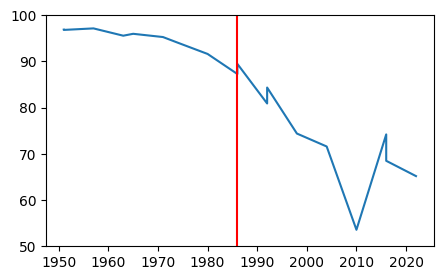

In [ ]:
# Example: Austria
# ================

austria = (
              proc_df[(proc_df["Country"]=="Austria") & (proc_df["type"]=="Presidential")]
              .sort_values(["type","year"], ascending=[True, True])[sel_cols]
          )

plt.figure(figsize=(5,3))
plt.plot(austria["year"], austria["Voter_Turnout"])
plt.axvline(x=1986, color="red")
plt.ylim(50,100)
plt.show()

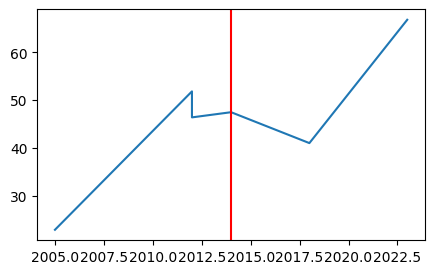

In [ ]:
# Example: Egypt
# ==============

egypt = (
          proc_df[(proc_df["Country"]=="Egypt") & (proc_df["type"]=="Presidential")]
          .sort_values(["type","year"], ascending=[True, True])[sel_cols]
       )

plt.figure(figsize=(5,3))
plt.plot(egypt["year"], egypt["Voter_Turnout"])
plt.axvline(x=2014, color="red")
plt.show()

## 3. Save processed dataset

In [ ]:
select_cols = ["year","Country","type","CV","Voter_Turnout","Population"]
proc_df.loc[:, select_cols].to_csv("proc-idea.csv", index=False)